In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
 
def plot_cm(testY, y_pred):
    from sklearn.metrics import classification_report,confusion_matrix
#     y_pred=np.argmax(testX_pred_i_LSTM, axis=1)
#     y_test=np.argmax(testY, axis=1)
    cm = confusion_matrix(testY, y_pred)

    print(cm)
    print(classification_report(testY,y_pred,digits=4))


    class_names = ['1','2','3']
    plot_confusion_matrix(cm, class_names)
    plot_confusion_matrix(cm, class_names, normalize=False)
    
def plot_confusion_matrix(cm, classes=['1','2','3'],
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):   #plt.cm.Blues、plt.cm.bone_r
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        from sklearn.metrics import classification_report
        import itertools
        import matplotlib.pyplot as plt
        from sklearn.metrics import confusion_matrix
        import numpy as np
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)
        plt.figure(figsize = (7, 7))
        plt.imshow(cm, interpolation='none', cmap=cmap)
        plt.title(title,size=20)
        plt.colorbar(aspect=5)
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45, size=18)
        plt.yticks(tick_marks, classes, size=18)

        fmt = '.4f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt), fontsize=18,
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label',size=20)
        plt.xlabel('Predicted label',size=20)
        plt.tight_layout()


In [3]:
train_dir = pd.read_csv("../Training/train_dir.csv")
test_dir = pd.read_csv("../Testing/test_dir.csv")
print(len(train_dir), len(test_dir))

678 170


# 總體sample_based 預測結果
# 可以對照有無和實驗二相同

[[58504  5697     0]
 [ 5264 69044  3514]
 [  885  5520 59546]]
              precision    recall  f1-score   support

           0     0.9049    0.9113    0.9081     64201
           1     0.8602    0.8872    0.8735     77822
           2     0.9443    0.9029    0.9231     65951

    accuracy                         0.8996    207974
   macro avg     0.9031    0.9004    0.9016    207974
weighted avg     0.9007    0.8996    0.8999    207974

Normalized confusion matrix
[[0.91126306 0.08873694 0.        ]
 [0.06764154 0.88720413 0.04515433]
 [0.01341905 0.0836985  0.90288244]]
Confusion matrix, without normalization
[[58504  5697     0]
 [ 5264 69044  3514]
 [  885  5520 59546]]


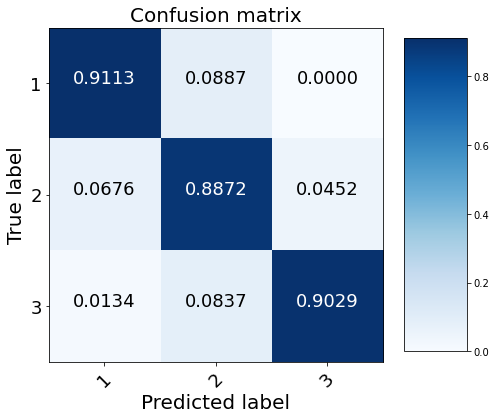

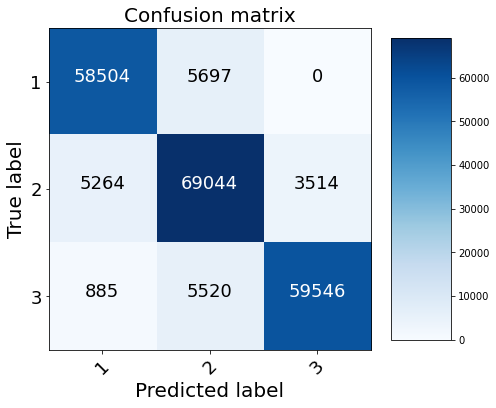

In [4]:
Bdriverid=[31932651,31931745,31929871,31932404,31902662,
           31932370,31928725,31932602,31931992,31902118] 
Y_pred = []
Y_true = []

test_dir_ = test_dir.values
test_dir_ = test_dir_.reshape(-1,)
for i in test_dir_:
    a = os.path.split(i)[0]
#     print(a)
    y_pred = np.load(a + '/results/y_pred_RF.npy')
    y = pd.read_csv(a + '/Y_level3_05s.csv')
    y_pred=np.argmax(y_pred, axis=1)
    y = y.values -1
    y = y.reshape(-1)
#     print(y_pred.shape, y.shape)
    Y_pred.extend(y_pred)
    Y_true.extend(y)
            
plot_cm(Y_true, Y_pred)

# journey-based results
## 算各個旅次的真值、預測值
#### ______main_______


In [1]:
# 母體比值
ratio_05s = {1: 331851, 2: 415120, 3: 339537}
ratio_1s = {1: 166929, 2: 759464, 3: 160115}
ratio_15s = {1: 72400, 2: 942859, 3: 71249}
#
def ratio_count(y):
    unique, counts = np.unique(y, return_counts=True)
    print(dict(zip(unique, counts)))
    return dict(zip(unique, counts))
#phase 4 - risk rule for journey
def level_journey_based(j,k):
    # 設定default，會自動按照key排序
    j.setdefault(1, 0)
    j.setdefault(2, 0)
    j.setdefault(3, 0)

    print(j)

    if j[3]/(j[1]+j[2]+j[3]) > k[3] / (k[1]+k[2]+k[3]) :
        return 3
    elif j[2]/(j[1]+j[2]+j[3]) > k[2] / (k[1]+k[2]+k[3]) :
        return 2
    elif j[3] > j[1]:
        return 3
    else:
        return 1


In [56]:
import time
start = time.time()

truelevel_journey_based_all = []
predlevel_journey_based_all = []

test_dir_ = test_dir.values
test_dir_ = test_dir_.reshape(-1,)
for i in test_dir_:
    print(i)
    a = os.path.split(i)[0]

    if not os.path.exists(a + '/results_journey_based'):
        os.mkdir(a + '/results_journey_based')

    y = pd.read_csv(a + '/Y_level3_05s.csv')
    y_pred = np.load(a + '/results/y_pred_RF.npy')
    # journel_based level identified
    ratio_true = ratio_count(y)
    truelevel_journey_based = level_journey_based(ratio_true, ratio_05s)
    truelevel_journey_based_all.append(truelevel_journey_based)
    
    y_pred=np.argmax(y_pred, axis=1)
    y_pred = y_pred+1

    ratio_pred = ratio_count(y_pred)
    predlevel_journey_based = level_journey_based(ratio_pred, ratio_05s)
    predlevel_journey_based_all.append(predlevel_journey_based)
    
    # reshape for save to df_to_csv
    truelevel_journey_based_r = np.array(truelevel_journey_based).reshape(-1,1)
    predlevel_journey_based_r = np.array(predlevel_journey_based).reshape(-1,1)
    
    truelevel_journey_based_all_r = np.array(truelevel_journey_based_all).reshape(-1,1)
    predlevel_journey_based_all_r = np.array(predlevel_journey_based_all).reshape(-1,1)
    
    pd.DataFrame(truelevel_journey_based_r).to_csv(a + '/results_journey_based/truelevel_journey_based_RF_05.csv', index=False)
    pd.DataFrame(predlevel_journey_based_r).to_csv(a + '/results_journey_based/predlevel_journey_based_RF_05.csv', index=False)
    
    pd.DataFrame(truelevel_journey_based_all_r).to_csv('../results/truelevel_journey_based_all_RF_05.csv', index=False)
    pd.DataFrame(predlevel_journey_based_all_r).to_csv('../results/predlevel_journey_based_all_RF_05.csv', index=False)

    print("------------------------")
print(len(truelevel_journey_based_all), len(predlevel_journey_based_all))

end = time.time()
print(start, end)
print("執行時間：%f 秒" % (end - start))    

/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31931992/2020-10-17_121/2020-10-17_121.pickle
{1: 54, 2: 804, 3: 253}
{1: 54, 2: 804, 3: 253}
{1: 38, 2: 832, 3: 241}
{1: 38, 2: 832, 3: 241}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31932404/2020-10-23_153/2020-10-23_153.pickle
{1: 1010, 2: 635, 3: 58}
{1: 1010, 2: 635, 3: 58}
{1: 1029, 2: 649, 3: 25}
{1: 1029, 2: 649, 3: 25}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31931745/2020-10-28_30/2020-10-28_30.pickle
{1: 5, 2: 191, 3: 826}
{1: 5, 2: 191, 3: 826}
{1: 2, 2: 171, 3: 849}
{1: 2, 2: 171, 3: 849}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31931992/2020-10-22_133/2020-10-22_133.pickle
{1: 463, 2: 693, 3: 194}
{1: 463, 2: 693, 3: 194}
{1: 450, 2: 731, 3: 169}
{1: 450, 2: 731, 3: 

{1: 114, 2: 379, 3: 1870}
{1: 114, 2: 379, 3: 1870}
{1: 109, 2: 298, 3: 1956}
{1: 109, 2: 298, 3: 1956}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31932370/2020-09-05_249/2020-09-05_249.pickle
{1: 199, 2: 319, 3: 110}
{1: 199, 2: 319, 3: 110}
{1: 193, 2: 338, 3: 97}
{1: 193, 2: 338, 3: 97}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31932651/2020-09-10_82/2020-09-10_82.pickle
{1: 388, 2: 376, 3: 98}
{1: 388, 2: 376, 3: 98}
{1: 431, 2: 378, 3: 53}
{1: 431, 2: 378, 3: 53}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31932370/2020-10-22_310/2020-10-22_310.pickle
{1: 804, 2: 419, 3: 70}
{1: 804, 2: 419, 3: 70}
{1: 806, 2: 430, 3: 57}
{1: 806, 2: 430, 3: 57}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31902118/2

{1: 75, 2: 401, 3: 237}
{1: 75, 2: 401, 3: 237}
{1: 78, 2: 432, 3: 203}
{1: 78, 2: 432, 3: 203}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31931992/2020-10-09_126/2020-10-09_126.pickle
{1: 173, 2: 404, 3: 132}
{1: 173, 2: 404, 3: 132}
{1: 156, 2: 442, 3: 111}
{1: 156, 2: 442, 3: 111}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31931745/2020-10-06_15/2020-10-06_15.pickle
{1: 51, 2: 598, 3: 1924}
{1: 51, 2: 598, 3: 1924}
{1: 16, 2: 559, 3: 1998}
{1: 16, 2: 559, 3: 1998}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31932404/2020-10-28_180/2020-10-28_180.pickle
{1: 456, 2: 469, 3: 79}
{1: 456, 2: 469, 3: 79}
{1: 441, 2: 524, 3: 39}
{1: 441, 2: 524, 3: 39}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31931745/202

[[43  3  0]
 [ 2 70  0]
 [ 0  7 45]]
              precision    recall  f1-score   support

           1     0.9556    0.9348    0.9451        46
           2     0.8750    0.9722    0.9211        72
           3     1.0000    0.8654    0.9278        52

    accuracy                         0.9294       170
   macro avg     0.9435    0.9241    0.9313       170
weighted avg     0.9350    0.9294    0.9296       170

Normalized confusion matrix
[[0.93478261 0.06521739 0.        ]
 [0.02777778 0.97222222 0.        ]
 [0.         0.13461538 0.86538462]]
Confusion matrix, without normalization
[[43  3  0]
 [ 2 70  0]
 [ 0  7 45]]


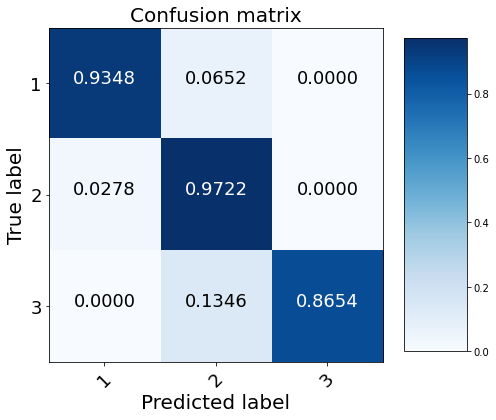

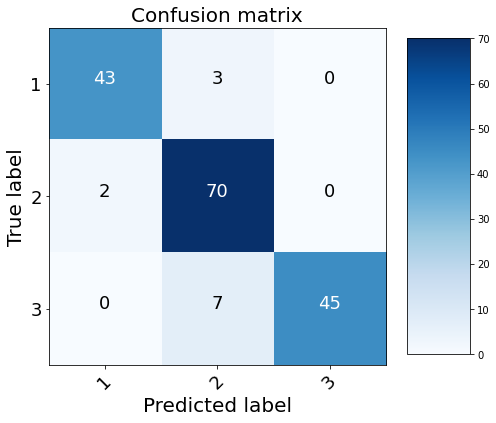

In [57]:
plot_cm(truelevel_journey_based_all, predlevel_journey_based_all)

In [20]:
print(len(truelevel_journey_based_all), len(predlevel_journey_based_all))

170 170
